### Import Packages

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import seaborn as sns
import dask.dataframe as dd

import time
import psutil

## 1. Data Acquisition and Preprocessing: 

##### Load the dataset into a Pandas DataFrame

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\2360540621.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [5]:
pd.reset_option('display.max_columns')

##### Explore the dataset to understand its structure and features

In [6]:
n_rows, n_columns = df.shape
print('Number of Rows:', n_rows)
print('Number of Columns:', n_columns)

Number of Rows: 181691
Number of Columns: 135


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [8]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

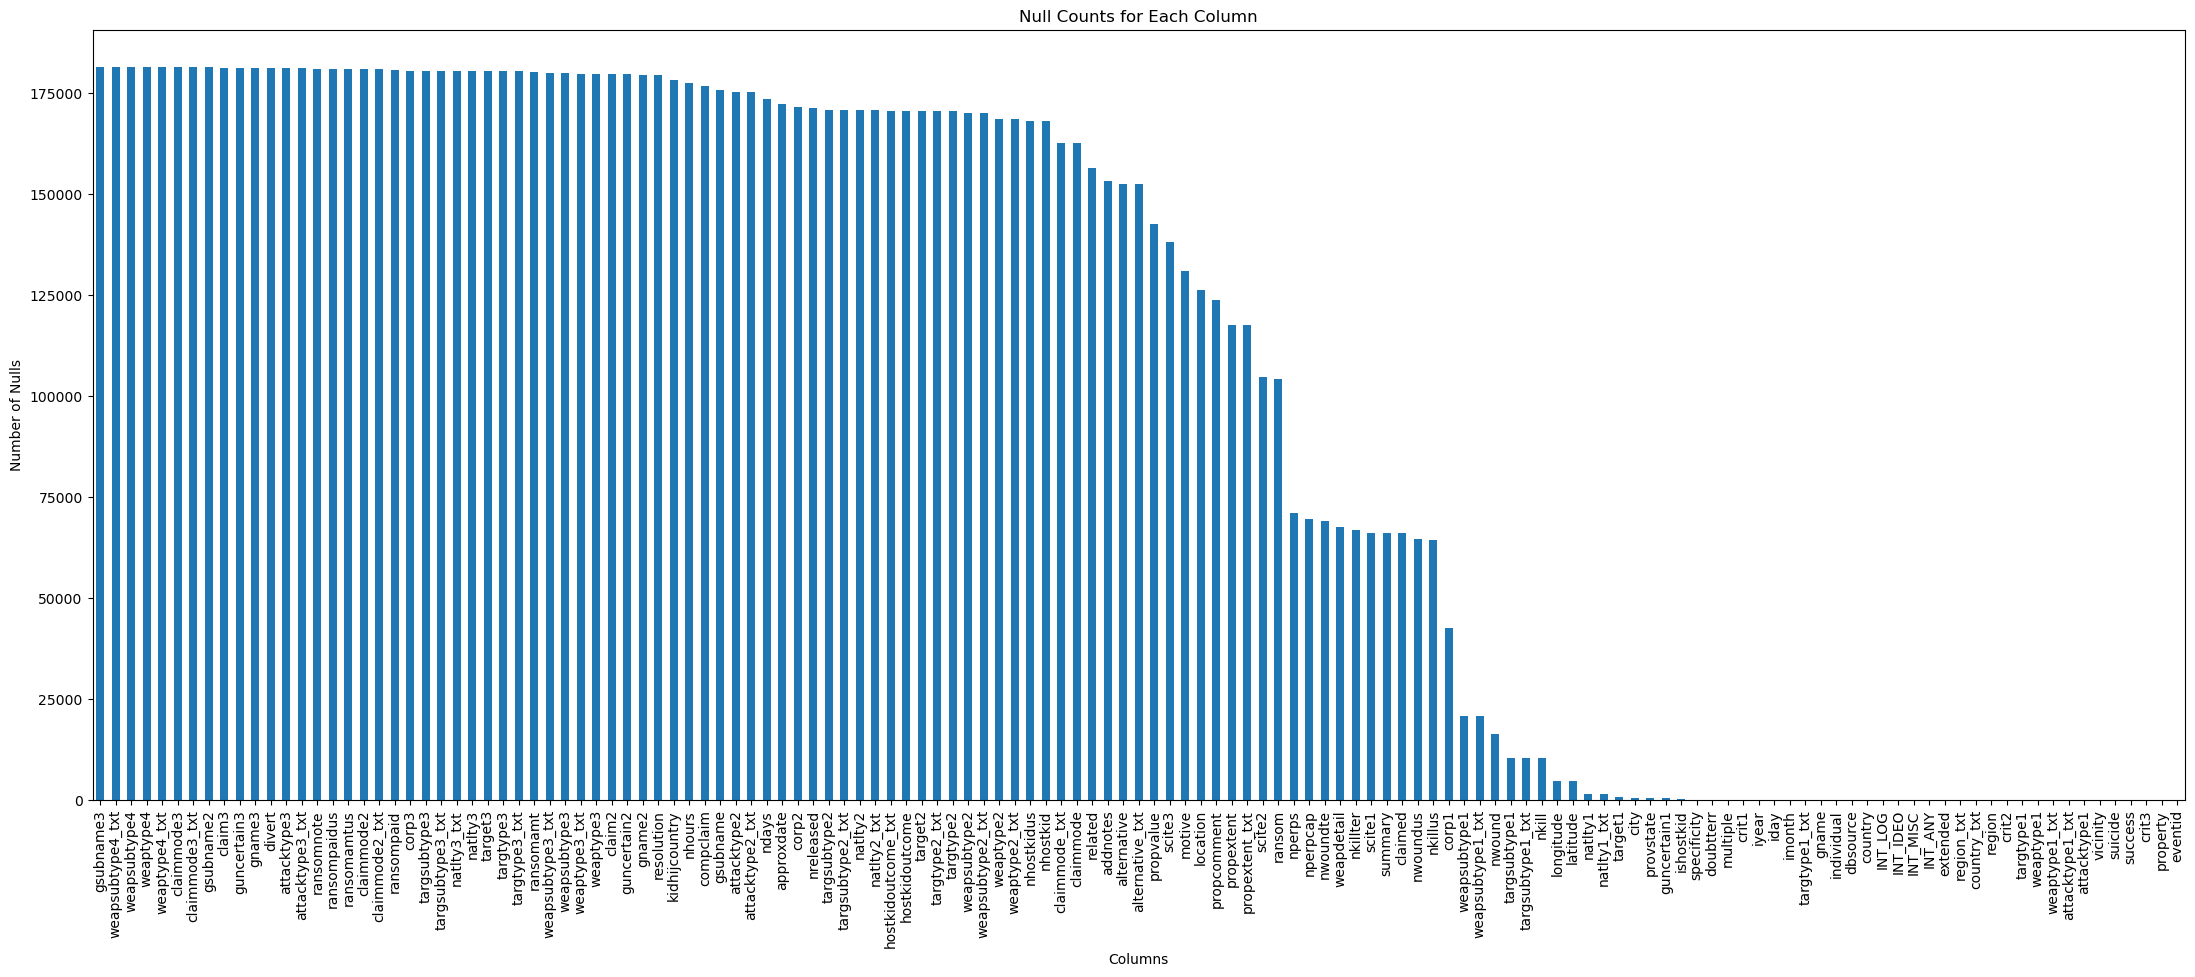

In [9]:
# number of nulls for each column
vc_nulls = df.apply(lambda x: x.isnull().sum())

vc_nulls = vc_nulls.sort_values(ascending=False)

plt.figure(figsize=(27, 10))  
vc_nulls.plot(kind='bar')
plt.title('Null Counts for Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=90) 
plt.show()

##### Handle missing values and perform data cleaning where necessary

In [10]:
df.rename(columns=
          {'iyear':'Year',
           'imonth':'Month',
           'iday':'Day',
           'country_txt':'Country',
           'region_txt':'Region',
           'city':'City',
           'provstate':'State',
           'latitude':'Latitude',
           'longitude':'Longitude',
           'success':'Success',
           'suicide':'Suicide',
           'attacktype1_txt':'AttackType',
           'target1':'Target',
           'nkill':'Killed',
           'nwound':'Wounded',
           'gname':'Group',
           'targtype1_txt':'Target_type',
           'weaptype1_txt':'Weapon_type'
          },
          inplace=True)

In [11]:
df['Casualties'] = df['Killed'] + df['Wounded']

In [12]:
df_final = df[['Year','Month','Day','Country','Region','City','State','Latitude','Longitude','Success','Suicide','AttackType','Killed','Wounded','Casualties','Target','Group','Target_type','Weapon_type']]

In [13]:
df_final.head()

,Year,Month,Day,Country,Region,City,State,Latitude,Longitude,Success,Suicide,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,1,0,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,1,0,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,Attica,37.997490,23.762728,1,0,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [14]:
n_rows, n_columns = df_final.shape
print('Number of Rows:', n_rows)
print('Number of Columns:', n_columns)

Number of Rows: 181691
Number of Columns: 19


In [15]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   State        181270 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  AttackType   181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Wounded      165380 non-null  float64
 14  Casualties   164817 non-null  float64
 15  Target       181055 non-null  object 
 16  Group        181691 non-null  object 
 17  Target_type  181691 non-null  object 
 18  Weapon_type  181691 non-

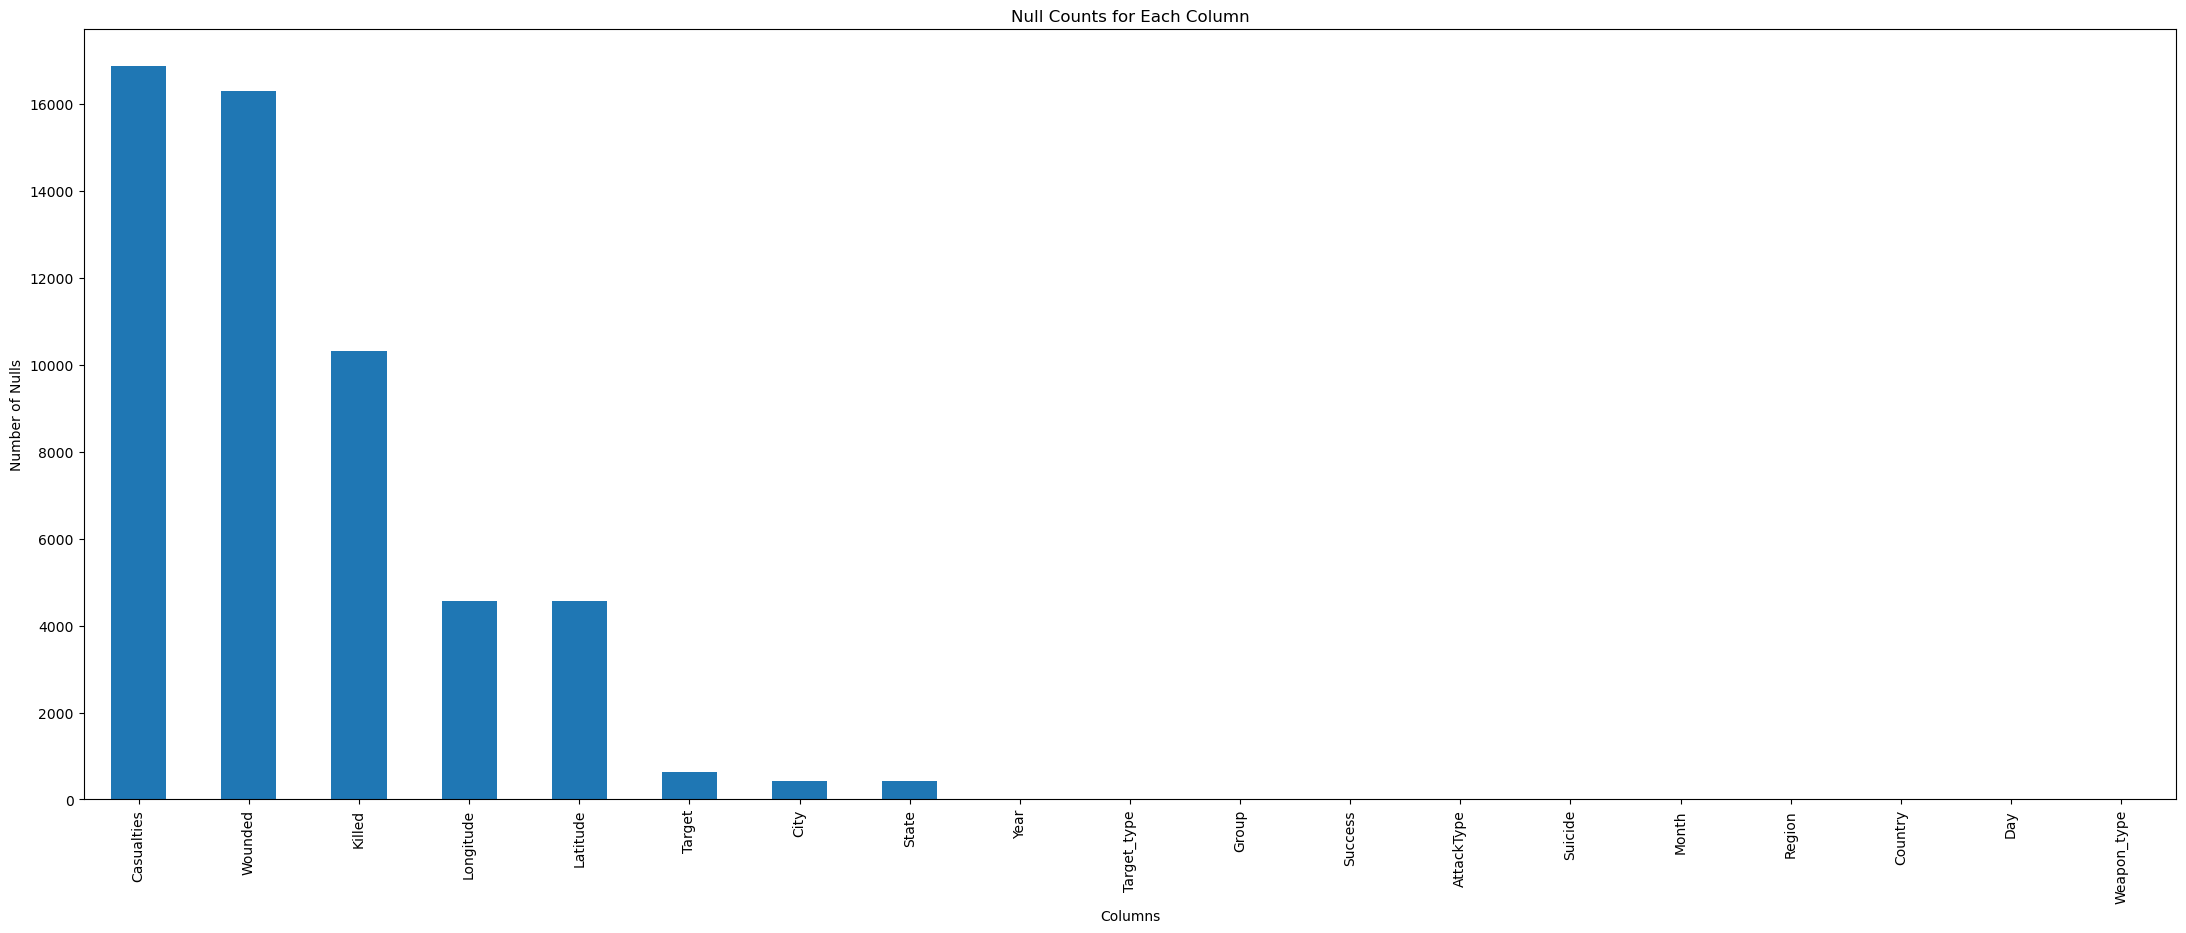

In [16]:
# number of nulls for each column
vc_nulls = df_final.apply(lambda x: x.isnull().sum())

vc_nulls = vc_nulls.sort_values(ascending=False)

plt.figure(figsize=(27, 10))  
vc_nulls.plot(kind='bar')
plt.title('Null Counts for Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=90) 
plt.show()

In [17]:
df_final.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
State            421
Latitude        4556
Longitude       4557
Success            0
Suicide            0
AttackType         0
Killed         10313
Wounded        16311
Casualties     16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [18]:
df_final['City'].fillna('Unknown', inplace=True) 
df_final['State'].fillna('Unknown', inplace=True)
df_final['Target'].fillna('Unknown', inplace=True)
df_final['Killed'].fillna(0, inplace=True)
df_final['Wounded'].fillna(0, inplace=True)
df_final['Casualties'].fillna(0, inplace=True)


C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\3215254598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['City'].fillna('Unknown', inplace=True)
C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\3215254598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['State'].fillna('Unknown', inplace=True)
C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\3215254598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [19]:
# Calculate mean latitude and longitude for each region where known
region_means = df_final.groupby('Region')[['Latitude', 'Longitude']].mean()

# Fill missing latitude and longitude based on region means
df_final['Latitude'] = df_final.apply(lambda row: row['Latitude'] if pd.notna(row['Latitude']) else region_means.loc[row['Region']]['Latitude'], axis=1)
df_final['Longitude'] = df_final.apply(lambda row: row['Longitude'] if pd.notna(row['Longitude']) else region_means.loc[row['Region']]['Longitude'], axis=1)

C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\223219567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Latitude'] = df_final.apply(lambda row: row['Latitude'] if pd.notna(row['Latitude']) else region_means.loc[row['Region']]['Latitude'], axis=1)
C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\223219567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Longitude'] = df_final.apply(lambda row: row['Longitude'] if pd.notna(row['Longitude']) else region_means.loc[row['Region']][

In [20]:
df_final.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
State          0
Latitude       0
Longitude      0
Success        0
Suicide        0
AttackType     0
Killed         0
Wounded        0
Casualties     0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df_final.to_csv("globalterrorism-cleaned.csv", sep = ",", index=False)

##### Use Dask to handle large data e iciently and compare the performance with Pandas for certain operations

In [23]:
pd_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

C:\Users\yousf\AppData\Local\Temp\ipykernel_18396\3792403432.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


In [24]:
 # Create a large DataFrame using Dask
 dask_df = dd.from_pandas(pd_df, npartitions=5)

In [25]:
start_time = time.time()
pd_df['eventid'].isnull().sum()
duration = time.time() - start_time
print(duration)

0.0019927024841308594


In [26]:
start_time = time.time()
dask_df['eventid'].isnull().sum().compute()
duration = time.time() - start_time
print(duration)

0.010040044784545898


<b> We can see that dask takes more time aggregating nulls than pandas, and this time decreasess wheen decrease the number of partations

## 2. Data Analysis: 

In [27]:
df_final = pd.read_csv('globalterrorism-cleaned.csv')

In [28]:
df_final.head()

,Year,Month,Day,Country,Region,City,State,Latitude,Longitude,Success,Suicide,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Unknown,18.456792,-69.951164,1,0,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,1,0,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,Attica,37.997490,23.762728,1,0,Bombing/Explosion,0.0,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,0.0,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


##### Perform basic statistical analysis using Numpy to summarize the data

In [29]:
num_cols = ['Killed', 'Wounded', 'Casualties']

for col in num_cols:
    mean_value = np.mean(df_final[col].dropna())
    median_value = np.median(df_final[col].dropna())
    std_dev = np.std(df_final[col].dropna())
    
    print(f"{col}: Mean = {mean_value}, Median = {median_value}, Standard Deviation = {std_dev}")
    print(20 * '*')


Killed: Mean = 2.2668596683380025, Median = 0.0, Standard Deviation = 11.227026186421607
********************
Wounded: Mean = 2.8832963658078827, Median = 0.0, Standard Deviation = 34.30965287004252
********************
Casualties: Mean = 4.804266584475841, Median = 1.0, Standard Deviation = 40.09726855096794
********************


In [30]:
cat_cols = ['Country', 'Region', 'City', 'State', 'AttackType', 'Target', 'Group', 'Target_type', 'Weapon_type']

for col in cat_cols:
    mode = df_final[col].value_counts().index[0]
    if mode  == 'Unknown':
        mode = df_final[col].value_counts().index[1]
    
    print(f"Most frequent value in {col}: {mode}")
    print(20 * '*')


Most frequent value in Country: Iraq
********************
Most frequent value in Region: Middle East & North Africa
********************
Most frequent value in City: Baghdad
********************
Most frequent value in State: Baghdad
********************
Most frequent value in AttackType: Bombing/Explosion
********************
Most frequent value in Target: Civilians
********************
Most frequent value in Group: Taliban
********************
Most frequent value in Target_type: Private Citizens & Property
********************
Most frequent value in Weapon_type: Explosives
********************


##### Use Pandas

##### Group data by various categories (e.g., year, region, attack type) and calculate aggregate statistics.

In [31]:
# The total number of attacks for each year 
df_final.groupby('Year').size().sort_values(ascending=False).head()

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
dtype: int64

In [32]:
# The most 5 attack types
df_final.groupby('AttackType').size().sort_values(ascending=False).head()

AttackType
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
dtype: int64

In [33]:
# The most regions that have been attcked
df_final.groupby('Region').size().sort_values(ascending=False).head()

Region
Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
dtype: int64

In [34]:
# The Cities that have most Casualties
df_final[['Casualties','City']].groupby('City').sum().sort_values('Casualties', ascending=False).head()

,Casualties
City,
Baghdad,76897.0
Unknown,32651.0
New York City,19618.0
Mosul,12360.0
Karachi,9201.0


In [35]:
# The number of cities each group attack (Most 5 Groups)
df_final[['Group', 'City']].groupby('Group').nunique().sort_values('City', ascending=False).head()

,City
Group,
Unknown,17426
Taliban,2075
New People's Army (NPA),1375
Communist Party of India - Maoist (CPI-Maoist),1043
Maoists,1025


In [36]:
# Most 5 groups according to number of Casualties
df_final[['Group', 'Casualties']].groupby('Group').sum().sort_values('Casualties', ascending=False).head()

,Casualties
Group,
Unknown,313997.0
Islamic State of Iraq and the Levant (ISIL),58223.0
Taliban,54459.0
Al-Qaida,28340.0
Liberation Tigers of Tamil Eelam (LTTE),20859.0


In [37]:
# Most groups that use Suicide as a method to do their attack
df_final[['Group', 'Suicide']].groupby('Group').sum().sort_values('Suicide', ascending=False).head()

,Suicide
Group,
Unknown,2336
Islamic State of Iraq and the Levant (ISIL),1305
Taliban,708
Boko Haram,443
Tehrik-i-Taliban Pakistan (TTP),177


In [38]:
# Most groups that use Suicide as a method to do their attack
df_final[['Group', 'Target_type']].groupby('Group').count().sort_values('Target_type', ascending=False).head()

,Target_type
Group,
Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351


In [39]:
# Group by 'Group' and 'Target_type' and count occurrences
group_target_count = df_final.groupby(['Group', 'Target_type']).size().reset_index(name='count')

# Find the most frequent Target_type for each Group
group_target_count.loc[group_target_count.groupby('Group')['count'].idxmax()].sort_values('count', ascending=False).head()

,Group,Target_type,count
9123,Unknown,Private Citizens & Property,20784
8399,Taliban,Police,2535
3993,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,2240
536,Al-Shabaab,Military,1412
2885,Farabundo Marti National Liberation Front (FMLN),Military,1230


##### Identify trends over time (e.g., number of attacks per year).

In [40]:
# The total number of attacks for each year 
df_final.groupby('Year').size().reset_index(name='Number of Attacks').sort_values('Number of Attacks', ascending=False).head()

,Year,Number of Attacks
43,2014,16903
44,2015,14965
45,2016,13587
42,2013,12036
46,2017,10900


In [41]:
# The total number of Casualties for each year 
df_final[['Year', 'Casualties']].groupby('Year').sum().sort_values('Casualties', ascending=False).head()

,Casualties
Year,
2015,72833.0
2016,69225.0
2014,68853.0
2013,57679.0
2017,48208.0


In [42]:
# Group by 'Year' and 'City' and count occurrences
year_city_count = df_final.groupby(['Year', 'City']).size().reset_index(name='Count')

# Find the city with the maximum attacks for each year
year_city_count.loc[year_city_count.groupby('Year')['Count'].idxmax()].sort_values('Count', ascending=False).head()


,Year,City,Count
52772,2015,Baghdad,1001
58178,2016,Baghdad,986
47437,2014,Baghdad,898
46800,2013,Unknown,725
21059,1995,Karachi,614


##### Determine the most affected regions and countries. 

In [43]:
df_final.groupby('Region').size().sort_values(ascending=False).head()

Region
Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
dtype: int64

In [44]:
df_final.groupby('Country').size().sort_values(ascending=False).head()

Country
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
dtype: int64

##### Identify the most common attack types and targets.

In [45]:
# The most 5 attack types
df_final.groupby('AttackType').size().sort_values(ascending=False).head()

AttackType
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
dtype: int64

In [46]:
# The most 5 target
df_final.groupby('Target').size().sort_values(ascending=False).head()

Target
Unknown       6554
Civilians     6461
Soldiers      3157
Patrol        2942
Checkpoint    2905
dtype: int64

## 3. Data Visualization: 

#### Use Matplotlib and Seaborn to create visualizations: 

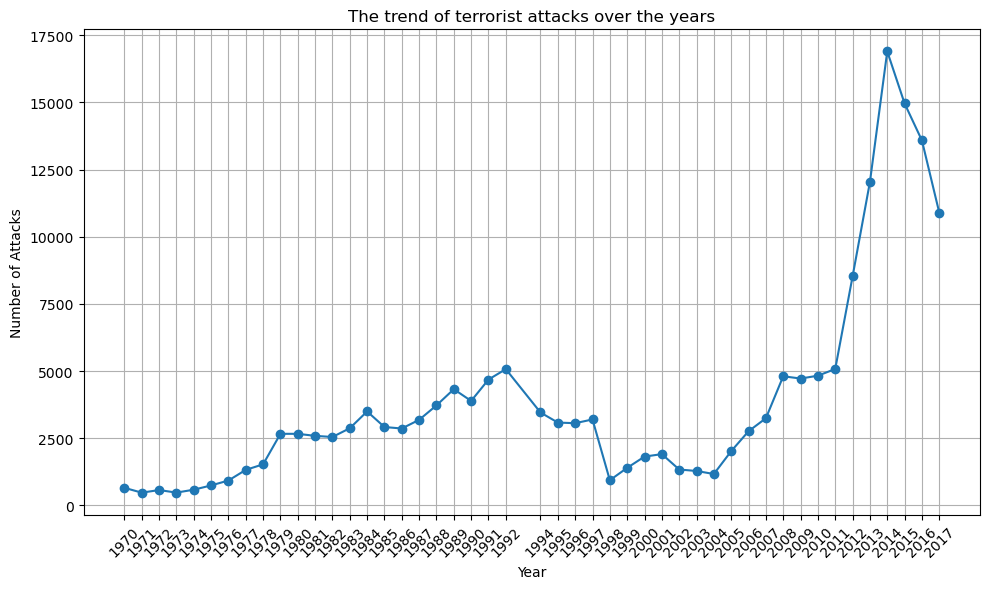

In [47]:
#Line plot showing the trend of terrorist attacks over the years. 
nattacks = df_final.groupby('Year').size().reset_index(name='Number of Attacks').reset_index()
plt.figure(figsize=(10, 6))
plt.plot(nattacks['Year'], nattacks['Number of Attacks'], marker='o', linestyle='-')
plt.xlabel("Year") 
plt.ylabel("Number of Attacks") 
plt.grid(True)
plt.xticks(nattacks['Year'], rotation=45)
plt.title("The trend of terrorist attacks over the years") 
plt.tight_layout()

##### Bar plot of the number of attacks by region and by country. 

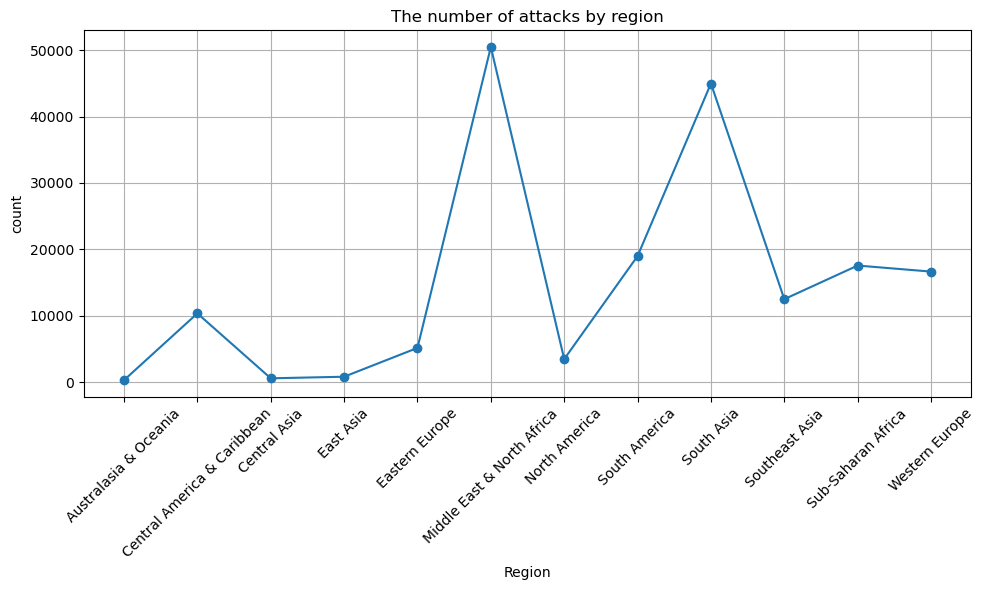

In [48]:
region_attacks = df_final.groupby('Region').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.plot(region_attacks['Region'], region_attacks['count'], marker='o', linestyle='-')
plt.xlabel("Region") 
plt.ylabel("count") 
plt.grid(True)
plt.xticks(region_attacks['Region'], rotation=45)
plt.title("The number of attacks by region") 
plt.tight_layout()

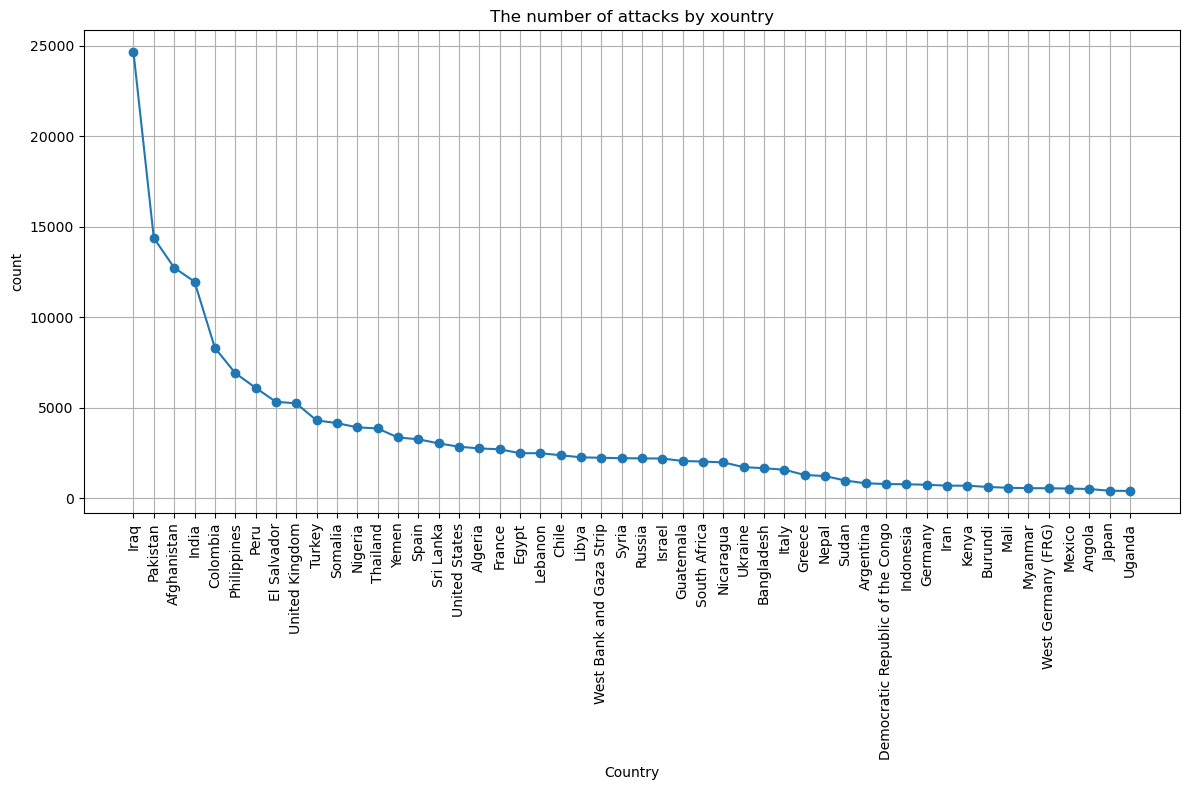

In [49]:
country_attacks = df_final.groupby('Country').size().reset_index(name='count').sort_values('count', ascending=False).head(50)
plt.figure(figsize=(12, 8))
plt.plot(country_attacks['Country'], country_attacks['count'], marker='o', linestyle='-')
plt.xlabel("Country") 
plt.ylabel("count") 
plt.grid(True)
plt.xticks(country_attacks['Country'], rotation=90)
plt.title("The number of attacks by xountry") 
plt.tight_layout()

##### Heatmap to visualize the correlation between different features. 

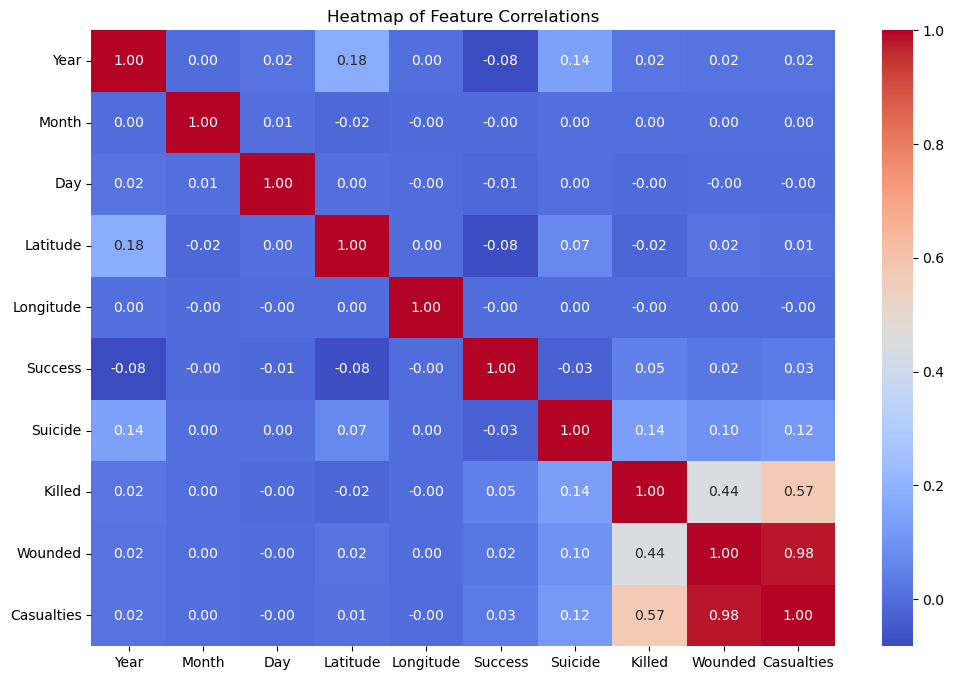

In [50]:
numeric_cols = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Success', 'Suicide', 'Killed', 'Wounded', 'Casualties']

correlation_matrix = df_final[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

##### Scatter plot showing the relationship between the number of casualties and the type of attack. 

In [51]:
attack_type_mapping = {
    1: 'ASSASSINATION',
    2: 'ARMED ASSAULT',
    3: 'BOMBING/EXPLOSION',
    4: 'HIJACKING',
    5: 'HOSTAGE TAKING (BARRICADE INCIDENT)',
    6: 'HOSTAGE TAKING (KIDNAPPING)',
    7: 'FACILITY / INFRASTRUCTURE ATTACK',
    8: 'UNARMED ASSAULT',
    9: 'UNKNOWN'
}

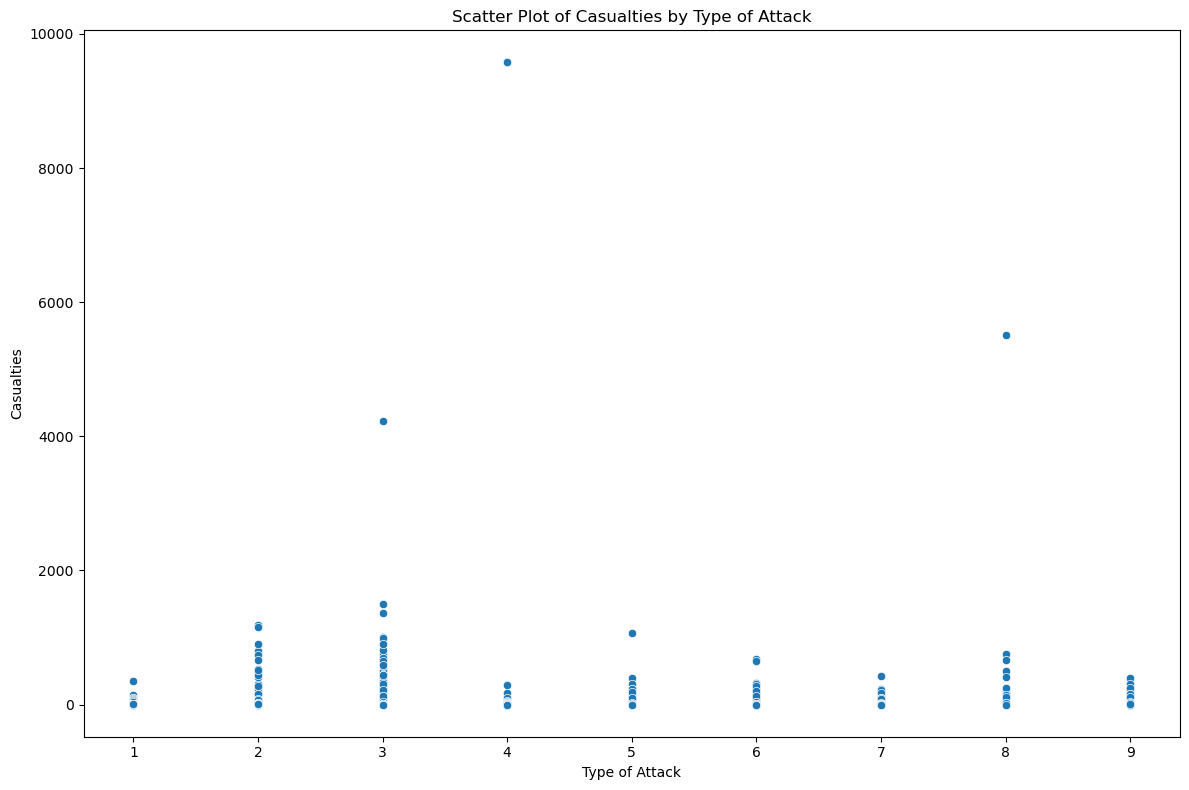

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='attacktype1', y='Casualties', data=df)
plt.xlabel("Type of Attack") 
plt.ylabel("Casualties") 
plt.title("Scatter Plot of Casualties by Type of Attack")
plt.tight_layout()

## 4. Performance Comparison with Dask: 

 ##### Demonstrate how to use Dask to perform similar operations as above with large datasets. 

In [53]:
 # Create a large DataFrame using Dask
 dask_df = dd.from_pandas(df_final, npartitions=5)

In [54]:
# The Cities that have most Casualties using dask
dask_df[['Casualties','City']].groupby('City').sum().sort_values('Casualties', ascending=False).compute().head()

,Casualties
City,
Baghdad,76897.0
Unknown,32651.0
New York City,19618.0
Mosul,12360.0
Karachi,9201.0


##### Compare the performance and memory usage of Dask operations with Pandas. 

In [55]:
# Measure time and memory usage for Pandas operation
start_time_pandas = time.time()

# Group by AttackType and calculate statistics
pandas_summary = df_final[['Casualties','City']].groupby('City').sum().sort_values('Casualties', ascending=False)

# Measure memory usage (peak memory)
mem_usage_pandas = psutil.Process().memory_info().peak_wset / 1024**2  # in MB

end_time_pandas = time.time()
pandas_execution_time = end_time_pandas - start_time_pandas

print("Pandas Execution Time:", pandas_execution_time, "seconds")
print("Pandas Peak Memory Usage:", mem_usage_pandas, "MB")
print(pandas_summary)

Pandas Execution Time: 0.07999992370605469 seconds
Pandas Peak Memory Usage: 1434.2109375 MB
               Casualties
City                     
Baghdad           76897.0
Unknown           32651.0
New York City     19618.0
Mosul             12360.0
Karachi            9201.0
...                   ...
Dheisha               0.0
Dhayfan               0.0
Dhaya                 0.0
Nsambya               0.0
zinarag               0.0

[36674 rows x 1 columns]


In [56]:
# Measure time and memory usage for Dask operation
start_time_dask = time.time()

# Group by AttackType and calculate statistics
dask_summary = dask_df[['Casualties','City']].groupby('City').sum().sort_values('Casualties', ascending=False).compute()

# Measure memory usage (peak memory)
mem_usage_dask = psutil.Process().memory_info().peak_wset / 1024**2  # in MB

end_time_dask = time.time()
dask_execution_time = end_time_dask - start_time_dask

print("Dask Execution Time:", dask_execution_time, "seconds")
print("Dask Peak Memory Usage:", mem_usage_dask, "MB")
print(dask_summary)


Dask Execution Time: 0.09043240547180176 seconds
Dask Peak Memory Usage: 1434.2109375 MB
                 Casualties
City                       
Baghdad             76897.0
Unknown             32651.0
New York City       19618.0
Mosul               12360.0
Karachi              9201.0
...                     ...
Ichanquito              0.0
Aleria                  0.0
Takhatbhai              0.0
Alexandroupolis         0.0
Medak District          0.0

[36674 rows x 1 columns]
